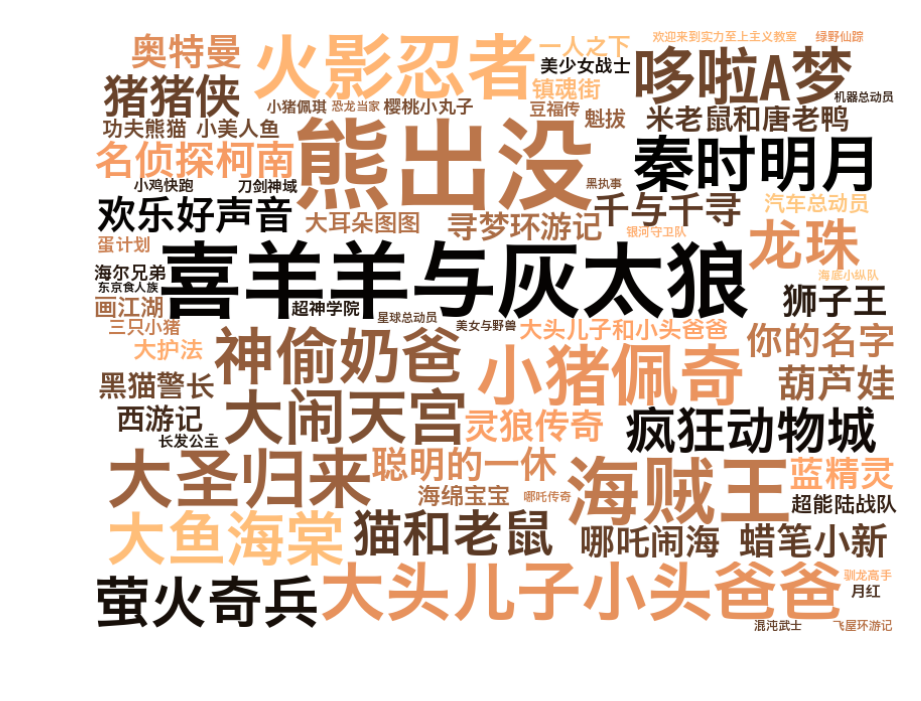

In [12]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud,ImageColorGenerator
from imageio import imread
from collections import Counter
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr_or_assign"

#word_cloud initial
# bg_pic=imread("yang.jpg")
wc = WordCloud(font_path=r"明黑等宽B.ttf",  # 设置字体
               background_color="white",  # 背景颜色
               max_words=2000,  # 词云显示的最大词数
#                mask=bg_pic,  # 设置背景图片
               max_font_size=100, min_font_size=12, # 字体最大值
               prefer_horizontal=1,#水平词条百分比
               relative_scaling=0.25, #根据出现频率确定的单词大小
               scale=1, #缩放比例，
               colormap='copper',
               width=800, height=600, margin=2# 设置图片默认的大小,但是如果使用背景图片的话,那么保存的图片大小将会按照其大小保存,margin为词语边缘距离
               )

#load data
data=pd.read_excel("最终最终分析用.xls")
#filter null blocks
f1=filter(lambda x:x not in (0,"0"),list(data.NEW_Q7_Open1))
d1=[item for item in f1]
f2=filter(lambda x:x not in (0,"0"),list(data.NEW_Q7_Open12))
d2=[item for item in f2]
#get full info from multi-answers
keyword=d1+d2
#get statistics of keywords ; l is a counter object
l=Counter(keyword)

#build wordcloud
wordcloud = wc.generate_from_frequencies(l);
# image_colors = ImageColorGenerator(bg_pic)
plt.figure(dpi=200)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [13]:
film_list=dict(l)
sort_list=sorted(film_list.items(), key=lambda x:x[1], reverse=True)
print("{:^3}\t{:^16}\t{:^3}".format("编号","影片","频数",chr(12288)))
for i in range(len(sort_list)):
    print("{0:^3}\t{1:{3}^12}\t{2:^3}".format(i+1,sort_list[i][0],sort_list[i][1],chr(12288)))

编号 	       影片       	频数 
 1 	　　　　熊出没　　　　　	124
 2 	　　喜羊羊与灰太狼　　　	46 
 3 	　　　　海贼王　　　　　	26 
 4 	　　　　火影忍者　　　　	20 
 5 	　　　　小猪佩奇　　　　	16 
 6 	　　　　大圣归来　　　　	15 
 7 	　　大头儿子小头爸爸　　	14 
 8 	　　　　哆啦A梦　　　　	12 
 9 	　　　　神偷奶爸　　　　	11 
10 	　　　　秦时明月　　　　	11 
11 	　　　　大闹天宫　　　　	10 
12 	　　　　大鱼海棠　　　　	 9 
13 	　　　　萤火奇兵　　　　	 9 
14 	　　　　　龙珠　　　　　	 9 
15 	　　　疯狂动物城　　　　	 9 
16 	　　　　猫和老鼠　　　　	 9 
17 	　　　　猪猪侠　　　　　	 6 
18 	　　　名侦探柯南　　　　	 6 
19 	　　　欢乐好声音　　　　	 6 
20 	　　　　葫芦娃　　　　　	 6 
21 	　　　聪明的一休　　　　	 5 
22 	　　　　你的名字　　　　	 5 
23 	　　　　奥特曼　　　　　	 5 
24 	　　　　蜡笔小新　　　　	 5 
25 	　　　　千与千寻　　　　	 5 
26 	　　　　蓝精灵　　　　　	 4 
27 	　　　　灵狼传奇　　　　	 4 
28 	　　　　狮子王　　　　　	 4 
29 	　　　　哪吒闹海　　　　	 4 
30 	　　　寻梦环游记　　　　	 4 
31 	　　米老鼠和唐老鸭　　　	 4 
32 	　　　　西游记　　　　　	 4 
33 	　　　　黑猫警长　　　　	 4 
34 	　大头儿子和小头爸爸　　	 3 
35 	　　　　海绵宝宝　　　　	 3 
36 	　　　大耳朵图图　　　　	 3 
37 	　　　　大护法　　　　　	 3 
38 	　　　　一人之下　　　　	 3 
39 	　　　　镇魂街　　　　　	 3 
40 	　　　　画江湖　　　　　	 3 
41 	　　　汽车总动员　　　　	 2 
42 	　　　　小美人鱼　　　　	 2 
43 	　　　　　魁拔　　　　　	 2 
44 	　　　超能陆战队　　　　	 2 
45 	　　　　功夫熊猫　　　　	 2 
46 	　　　　三只小猪　　　　	 2 
47 	　　　　蛋

/Users/tianyizhuang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


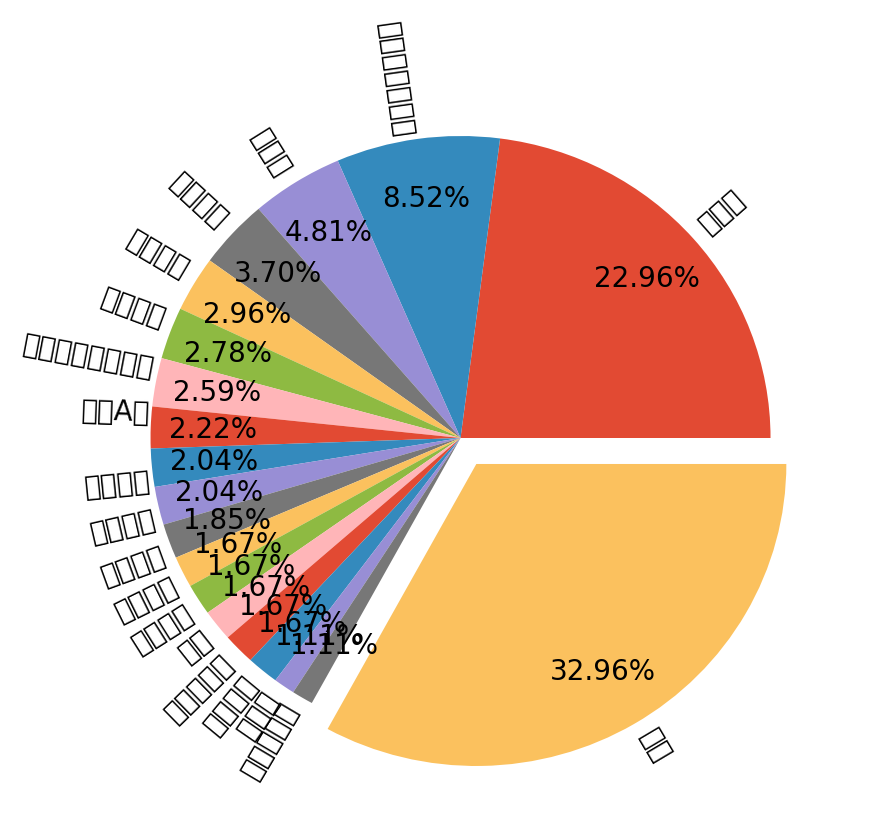

In [17]:
plt.figure(figsize=(5,5),dpi=200)
plt.style.use("ggplot")
d=pd.DataFrame(sort_list)
d.columns=['影片','频数']
# d['频率']=d['频数']/d['频数'].sum()
n=18
d2=d.head(n)
d2.loc[n]=['其他',d.iloc[n:,1].sum()]
ex=np.zeros(n+1)
ex[-1]=0.1
plt.pie(d2['频数'],labels=d2['影片'],autopct="%1.2f%%",labeldistance=1,pctdistance=0.8,rotatelabels=True,startangle=0,explode=ex);
plt.show()

In [16]:
d.iloc[12:,1:].sum()
d2

,影片,频数
0,熊出没,124
1,喜羊羊与灰太狼,46
2,海贼王,26
3,火影忍者,20
4,小猪佩奇,16
5,大圣归来,15
6,大头儿子小头爸爸,14
7,哆啦A梦,12
8,神偷奶爸,11
9,秦时明月,11


In [ ]:
#seperate data columns
c1=data.NEW_Q7_Open1
c2=data.NEW_Q7_Open12
gender=data.NEW_Q18
age=data.NEW_Q19_QOpen
diplomat=data.NEW_Q20
profession=data.NEW_Q21
income_level=data.NEW_Q22
district=data['区号']

def concat_dt(d1,d2):
    d1.columns=['result','factor']
    d2.columns=['result','factor']
    r_data=pd.concat([d1,d2])
    return r_data[(r_data.result!=0)&(r_data.result!="0")]

plt.figure(figsize=(8,30),dpi=200);
plt.style.use("ggplot")
ax1=plt.subplot2grid((6,2),(0,0))
ax1_2=plt.subplot2grid((6,2),(0,1))
ax2=plt.subplot2grid((6,2),(1,0),colspan=2)
ax3=plt.subplot2grid((6,2),(2,0),colspan=2)
ax4=plt.subplot2grid((6,2),(3,0),colspan=2)
ax5=plt.subplot2grid((6,2),(4,0),colspan=2)
ax6=plt.subplot2grid((6,2),(5,0),colspan=2)

#preference and gender
d1=data[['NEW_Q7_Open1',"NEW_Q18"]]
d2=data[['NEW_Q7_Open12',"NEW_Q18"]]
r_data1=concat_dt(d1,d2)
r_data1.columns=["Choice","Gender"]
a=pd.crosstab(r_data1.iloc[:,0],r_data1.iloc[:,1],margins=True)
#data pretretment
l1=a.sort_values(by=0,ascending=False)[0][1:11]
l2=a.sort_values(by=1,ascending=False)[1][1:11]
#IMG_SHOW
ax1.pie(l1,labels=l1.index,autopct="%1.2f%%",labeldistance=1,pctdistance=0.8,rotatelabels=True,startangle=-30)
plt.sca(ax1)
plt.title("女性对作品的偏好");
ax1_2.pie(l2,labels=l2.index,autopct="%1.2f%%",labeldistance=1,pctdistance=0.8,rotatelabels=True,startangle=-30)
plt.sca(ax1_2)
plt.title("男性对作品的偏好")

#preference and age
d1=pd.DataFrame([c1,age]).T
d2=pd.DataFrame([c2,age]).T
r_data2=concat_dt(d1,d2)
r_data2.columns=['Choice','Age']
below20=r_data2[r_data2.Age<20].Choice.value_counts()
a_20_29=r_data2[(r_data2.Age>=20)&(r_data2.Age<=29)].Choice.value_counts()
a_30_39=r_data2[(r_data2.Age>=30)&(r_data2.Age<=39)].Choice.value_counts()
a_40_49=r_data2[(r_data2.Age>=40)&(r_data2.Age<=49)].Choice.value_counts()
a_50_59=r_data2[(r_data2.Age>=50)&(r_data2.Age<=59)].Choice.value_counts()
above60=r_data2[r_data2.Age>=60].Choice.value_counts()
#data storage
filtered_data=pd.DataFrame([below20,a_20_29,a_30_39,a_40_49,a_50_59,above60]).T
filtered_data.columns=['<20',"20-29",'30-39','40-49','50-59','≥60']
ind=filtered_data[filtered_data.apply(lambda x:x.sum(),axis=1)>10].index
f1=filtered_data.fillna(0).div(filtered_data.sum(1).astype(float),axis=0)
y=f1.loc[ind].T.as_matrix()
# x.dtype='int8'
#IMG_SHOW
x=np.arange(1,len(ind)+1)
ax2.bar(x,list(y[0]),label=filtered_data.columns[0])
for i in range(1,len(filtered_data.columns)):
    ax2.bar(x,list(y[i]),bottom=sum(y[:i]),label=filtered_data.columns[i])
plt.sca(ax2)
plt.title("喜欢的作品关于年龄分层显示");
plt.xlabel("总计大于10的作品");
plt.ylabel("百分比");
plt.xticks(range(1,len(ind)+1),ind,fontsize=7);
box=ax2.get_position()
ax2.set_position([box.x0,box.y0,box.width*0.8,box.height]);
plt.legend(loc='upper right',bbox_to_anchor=(1.2,1));


#profession 
d1=pd.DataFrame([c1,profession]).T
d2=pd.DataFrame([c2,profession]).T
r_data3=concat_dt(d1,d2)
r_data3.columns=['Choice','Profession']
df2=r_data3.groupby(['Choice','Profession'])['Choice'].count().unstack('Profession').fillna(0)
clist=['下岗、待业或无业人员','农民或外来民工','离退休人员','国营、私营、三资企业工人','初高中/中专学生',
       '高校学生','商业服务业人员','个体工商户','自由职业者','一般职员/文员/秘书','专业技术人员/教师/医生',
       '私营企业主','公检法/军人/武警','企业领导或管理人员','机关/事业单位干部','其他']
plt.sca(ax3)
df2_1=df2[df2.apply(lambda x:x.sum(),axis=1)>10]
df2_1.div(df2_1.sum(1),axis=0).plot(kind='bar',stacked=True,ax=ax3)
# ax2.set_xticklabels(labels=plt.xticks(),rotation=0)
# a=ax2.get_xticklabels()
plt.xticks(rotation=20,fontsize=7);
ax3.xaxis.set_label_coords(0.5,-0.15) #设置坐标轴标题相对位置
plt.ylabel('百分比');
plt.title("喜欢的作品关于职业分层显示");
box=ax3.get_position()
ax3.set_position([box.x0,box.y0,box.width*0.8,box.height])
plt.legend(loc='upper right',bbox_to_anchor=(1.4,1.1),labels=clist);

#diplomat
d1=pd.DataFrame([c1,diplomat]).T
d2=pd.DataFrame([c2,diplomat]).T
r_data4=concat_dt(d1,d2)
r_data4.columns=['Choice','Diplomat']
df3=r_data4.groupby(['Choice','Diplomat'])['Choice'].count().unstack('Diplomat').fillna(0)
clist2=['小学及以下','初中','高中、中专或职中','大专','大学本科','双学位、硕士、博士']
df3_1=df3[df3.apply(lambda x:x.sum(),axis=1)>10]
df3_1.div(df3_1.sum(1),axis=0).plot(kind='bar',stacked=True,ax=ax4)
plt.sca(ax4)
plt.title("喜欢的作品关于学历分层显示");
plt.ylabel('百分比')
plt.xticks(rotation=20,fontsize=7)
ax4.xaxis.set_label_coords(0.5,-0.15)
box=ax4.get_position()
ax4.set_position([box.x0,box.y0,box.width*0.8,box.height])
plt.legend(loc='upper right',bbox_to_anchor=(1.33,1),labels=clist2)

#income_level
d1=pd.DataFrame([c1,income_level]).T
d2=pd.DataFrame([c2,income_level]).T
r_data4=concat_dt(d1,d2)
r_data4.columns=['Choice','Income_level']
df4=r_data4.groupby(['Choice','Income_level'])['Choice'].count().unstack('Income_level').fillna(0)
clist3=['无收入','1000元以下','1000-3000元','3000-5000元','5000-7000元','7000-10000元',
       '10000-15000元','15000-20000元','20000元以上']
df4_1=df4[df4.apply(lambda x:x.sum(),axis=1)>10]
df4_1.div(df4_1.sum(1),axis=0).plot(kind='bar',stacked=True,ax=ax5)
plt.sca(ax5)
ax5.legend(loc='upper left',ncol=2,labels=clist3)
plt.title("喜欢的作品关于收入水平分层显示");
plt.ylabel('百分比')
plt.xticks(rotation=20,fontsize=7)
box=ax5.get_position()
ax5.xaxis.set_label_coords(0.5,-0.15)
ax5.set_position([box.x0,box.y0,box.width*0.8,box.height])
plt.legend(loc='upper right',bbox_to_anchor=(1.28,1),labels=clist3)

#district
d1=pd.DataFrame([c1,district]).T
d2=pd.DataFrame([c2,district]).T
r_data5=concat_dt(d1,d2)
r_data5.columns=['Choice','District']
df5=r_data5.groupby(['Choice','District'])['Choice'].count().unstack('District').fillna(0)
df5_1=df5[df5.columns[df5.apply(lambda x:x.sum(),axis=0)>12]]
df5_2=df5_1[df5_1.apply(lambda x:x.sum(),axis=1)>8]
df5_3=df5_2.div(df5_2.sum(1),axis=0)
clist4=df5_3.columns
plt.sca(ax6)
df5_3.plot(kind='bar',stacked=True,ax=ax6)
box=ax6.get_position()
ax6.set_position([box.x0,box.y0,box.width*0.8,box.height])
plt.legend(loc='upper right',bbox_to_anchor=(1.2,1),labels=clist4)
plt.xticks(fontsize=7,rotation=10);

plt.subplots_adjust(wspace=0.5,hspace=0.4) 
plt.show()

In [ ]:
d1=pd.concat([data.iloc[:,54:73:2],data.iloc[:,137::2]],axis=1)
c_list=['家庭生活类','热血格斗类','青春偶像类','体育运动类','侦探推理类','奇幻灵异类','科学幻想类','幽默搞笑类','不喜欢动画','其他','性别','年龄','学历','职业','收入','地区']
d1.columns=c_list

#gender and topic
gen_tp=d1.groupby('性别').apply(lambda x:x.sum())
plt.figure(figsize=(11,36),dpi=200)
plt.style.use('ggplot')
ax1=plt.subplot(511)
female=gen_tp.iloc[0,:10]
male=gen_tp.iloc[1,:10]
a=plt.barh(range(10),female,label='女')
b=plt.barh(range(10),-male,label='男')
plt.yticks(range(10),c_list[0:10],fontsize=8)
plt.legend()
plt.title('动画题材偏好的性别分层');
box=ax1.get_position()
ax1.set_position([box.x0,box.y0,box.width*0.8,box.height])
plt.legend(loc='upper right',bbox_to_anchor=(1.1,1))

for x,y in zip(a,female):
    plt.text(x.get_width()+2,x.get_y()+x.get_height()*0.3,"%d"%y,ha='left',fontsize=8)
for x,y in zip(b,male):
    plt.text(x.get_width()-2,x.get_y()+x.get_height()*0.3,"%d"%y,ha='right',fontsize=8)
    

#age and topic
ax2=plt.subplot(512)
age_lev1=d1[d1['年龄']<20].apply(lambda x:x.sum())[:10]
age_lev2=d1[d1['年龄'].apply(lambda x: x in range(20,30))].apply(lambda x:x.sum())[:10]
age_lev3=d1[d1['年龄'].apply(lambda x: x in range(30,40))].apply(lambda x:x.sum())[:10]
age_lev4=d1[d1['年龄'].apply(lambda x: x in range(40,50))].apply(lambda x:x.sum())[:10]
age_lev5=d1[d1['年龄'].apply(lambda x: x in range(50,60))].apply(lambda x:x.sum())[:10]
age_lev6=d1[d1['年龄']>=60].apply(lambda x:x.sum())[:10]
age_tp=pd.DataFrame([age_lev1,age_lev2,age_lev3,age_lev4,age_lev5,age_lev6])
age_tp=age_tp.div(age_tp.sum(1),axis=0)
age_tp.plot(kind='bar',stacked=True,ax=ax2)
box=ax2.get_position()
ax2.set_position([box.x0,box.y0,box.width*0.8,box.height])
plt.legend(loc='upper right',bbox_to_anchor=(1.16,1))
plt.xticks(np.arange(6),filtered_data.columns,rotation=0)
plt.title('动画题材偏好的年龄分层')
plt.xlabel('')

#diplomat and topic
ax3=plt.subplot(513)
dip_tp=d1.groupby('学历').apply(lambda x:x.sum()).iloc[:,:10]
dip_tp.div(dip_tp.sum(1),axis=0).plot(kind='bar',stacked=True,ax=ax3)
box=ax3.get_position()
ax3.set_position([box.x0,box.y0,box.width*0.8,box.height])
plt.legend(loc='upper right',bbox_to_anchor=(1.16,1))
plt.xticks(np.arange(6),clist2,rotation=0)
plt.title('动画题材偏好的学历分层')
plt.xlabel('')

#profession and topic
ax4=plt.subplot(514)
pro_tp=d1.groupby('职业').apply(lambda x:x.sum()).iloc[:,:10]
pro_tp.div(pro_tp.sum(1),axis=0).plot(kind='bar',stacked=True,ax=ax4)
box=ax4.get_position()
ax4.set_position([box.x0,box.y0,box.width*0.8,box.height])
plt.legend(loc='upper right',bbox_to_anchor=(1.16,1))
plt.xticks(np.arange(16),clist,rotation=20,fontsize=8,ha='right')
plt.title('动画题材偏好的职业分层')
plt.xlabel('')

#district and topic
ax5=plt.subplot(515)
d2=d1.groupby('地区').sum().iloc[1:,:10]
d2_1=d2[d2.apply(lambda x:x.sum(),axis=1)>25]
d2_1.div(d2_1.sum(1),axis=0).plot(kind='bar',stacked=True,ax=ax5)
plt.title('动画题材的地区分层');
box=ax5.get_position()
ax5.set_position([box.x0,box.y0,box.width*0.8,box.height])
plt.legend(loc='upper right',bbox_to_anchor=(1.16,1))
plt.xticks(rotation=0)

plt.subplots_adjust(hspace=0.2) 
plt.show();

In [ ]:
# #comic movie views
# cm_v=data.NEW_Q1
# #duration of comic on tv 
# cm_tv=data.NEW_Q3
# #duration of comic online
# cm_ol=data.NEW_Q4
plt.figure(figsize=(10,10),dpi=200)

d2=pd.concat([data.loc[:,['NEW_Q1','NEW_Q3','NEW_Q4']],data.iloc[:,54:73:2]],axis=1)
c_list2=['动画电影观看次数','电视动画观看时长','网络动画观看时长','家庭生活类','热血格斗类','青春偶像类','体育运动类','侦探推理类','奇幻灵异类','科学幻想类','幽默搞笑类','不喜欢动画','其他']
d2.columns=c_list2
c_list3=['没有看过','1小时以下','1-3小时','4-7小时','7小时以上']
ax1=plt.subplot(211)
cm_v=d2.groupby('动画电影观看次数').sum().iloc[:,2:]
cm_v_1=cm_v.div(cm_v.sum(1),axis=0).plot.bar(stacked=True,ax=ax1)
box=ax1.get_position()
ax1.set_position([box.x0,box.y0,box.width*0.8,box.height])
plt.legend(loc='upper right',bbox_to_anchor=(1.3,1))
plt.xticks(rotation=0);
plt.title('动画题材关于动画电影观看次数的分层')

ax2=plt.subplot(212)
cm_tv=d2.groupby('电视动画观看时长').sum().iloc[:,2:]
cm_tv_1=cm_tv.div(cm_tv.sum(1),axis=0)
cm_ol=d2.groupby('网络动画观看时长').sum().iloc[:,2:]
cm_ol_1=cm_ol.div(cm_ol.sum(1),axis=0).apply(lambda x:x*(-1))
cm_tv_1.plot.barh(stacked=True,ax=ax2)
cm_ol_1.plot.barh(stacked=True,ax=ax2)
box=ax2.get_position()
ax2.set_position([box.x0,box.y0,box.width*0.8,box.height])
plt.yticks(np.linspace(0,5,6),c_list3)
plt.legend(loc='upper right',bbox_to_anchor=(1.3,1))
plt.plot([0,0],[-1,5],'-w')
# plt.xlim(-1.1,1.1)
plt.ylim(-1,5);
plt.text(0.1,4.5,'电视动画',ha='left',fontsize=16);
plt.text(-0.1,4.5,'网络动画',ha='right',fontsize=16);


In [ ]:
d1=pd.concat([data.iloc[:,5:29:2],data.iloc[:,54:73:2]],axis=1)
c_list4=['新闻网站','微信','微博','新闻手机客户端APP','豆瓣、人人等社交媒体','朋友、熟人介绍','电视宣传','报纸、杂志等宣传','宣传海报、户外广告','单位组织','猫眼等票务组织、时光网','从不了解','家庭生活类','热血格斗类','青春偶像类','体育运动类','侦探推理类','奇幻灵异类','科学幻想类','幽默搞笑类','不喜欢动画','其他']
d1.columns=c_list4
plt.figure(figsize=(10,6),dpi=200)

ax=plt.subplot(211)
for i in range(12):
    a=d1.groupby(c_list4[i]).sum().iloc[1,11:]
    a=a.div(a.sum(),axis=0)
    ax.bar(i,a[0],label=a.index[0])
    for j in range(1,10):
        ax.bar(i,a[j],bottom=sum(a[:j]),label=a.index[j])
    plt.gca().set_prop_cycle(None)#reset color cycle
        
# box=ax.get_position()
# ax.set_position([box.x0,box.y0,box.width*0.8,box.height])
plt.legend(loc='upper right',bbox_to_anchor=(1.2,1))
plt.xticks(np.linspace(0,11,12),c_list4[:12],fontsize=8,rotation=20,ha='right')
plt.title('动画题材关于了解渠道分层')

ax2=plt.subplot(212)
d2=pd.concat([data.iloc[:,35:48:2],data.iloc[:,54:73:2]],axis=1)
c_list5=['电脑','手机','平板电脑','电视频道','电视盒子/智能电视','光盘','其它','家庭生活类','热血格斗类','青春偶像类','体育运动类','侦探推理类','奇幻灵异类','科学幻想类','幽默搞笑类','不喜欢动画','其他']
d2.columns=c_list5
for i in range(7):
    a=d2.groupby(c_list5[i]).sum().iloc[1,6:]
    a=a.div(a.sum(),axis=0)
    ax2.bar(i,a[0],label=a.index[0])
    for j in range(1,10):
        ax2.bar(i,a[j],bottom=sum(a[:j]),label=a.index[j])
    plt.gca().set_prop_cycle(None)#reset color cycle

# box=ax2.get_position()
# ax2.set_position([box.x0,box.y0,box.width*0.8,box.height])
plt.legend(loc='upper right',bbox_to_anchor=(1.2,1))
c_list5=['电脑','手机','平板电脑','电视频道','电视盒子/智能电视','光盘','其他','家庭生活类','热血格斗类','青春偶像类','体育运动类','侦探推理类','奇幻灵异类','科学幻想类','幽默搞笑类','不喜欢动画','其他']
plt.xticks(np.linspace(0,6,7),c_list5[:7],fontsize=8,rotation=0,ha='center')
plt.title('动画题材关于观看设备分层')

plt.subplots_adjust(hspace=0.5) 
# plt.show()

In [ ]:
dd1=pd.concat([data.iloc[:,5:29:2],data.loc[:,'NEW_Q7_Open1']],axis=1)
dd1.columns=c_list4[:12]+['choice']
dd2=pd.concat([data.iloc[:,5:29:2],data.loc[:,'NEW_Q7_Open12']],axis=1)
dd2.columns=c_list4[:12]+['choice']
d3=pd.concat([dd1,dd2],axis=0).reset_index(drop=True)

plt.figure(figsize=(10,8),dpi=200)
ax1=plt.subplot(514)
for i in range(12):
    a=d3.groupby([c_list4[i],'choice'])['choice'].count().unstack().drop(['0',0],axis=1).fillna(0).iloc[1,:].sort_values(ascending=False)[:3]
    plt.bar([i-0.3,i,i+0.3],[a[1],a[0],a[2]],width=0.25,linewidth=0.3)
    plt.text(i,a[0]+1.3,a.index[0],fontsize=4,ha='center')
    plt.text(i-0.3,a[1]+0.8,a.index[1],fontsize=4,ha='center')
    plt.text(i+0.3,a[2]+0.6,a.index[2],fontsize=4,ha='center')
plt.xticks(np.linspace(0,11,12),c_list4[:12],fontsize=4);
plt.xlim(-0.8,11.8);
plt.title('动画作品关于渠道的序数排列');

dd1=pd.concat([data.loc[:,['NEW_Q1','NEW_Q3','NEW_Q4']],data.loc[:,'NEW_Q7_Open1']],axis=1)
dd1.columns=['动画电影观看次数','电视动画','网络动画','choice']
dd2=pd.concat([data.loc[:,['NEW_Q1','NEW_Q3','NEW_Q4']],data.loc[:,'NEW_Q7_Open12']],axis=1)
dd2.columns=['动画电影观看次数','电视动画','网络动画','choice']
d4=pd.concat([dd1,dd2],axis=0).reset_index(drop=True)
ax2=plt.subplot(511)
a=d4.groupby([d4.columns[0],'choice'])['choice'].count().unstack().drop(['0',0],axis=1).fillna(0)
for i in range(len(a.index)):
    b=a.iloc[i,:].sort_values(ascending=False)[:3]
    plt.bar([i-0.3,i,i+0.3],[b[1],b[0],b[2]],width=0.25,linewidth=0.3)
    plt.text(i,b[0]+1.3,b.index[0],fontsize=4,ha='center')
    plt.text(i-0.3,b[1]+0.8,b.index[1],fontsize=4,ha='center')
    plt.text(i+0.3,b[2]+0.6,b.index[2],fontsize=4,ha='center')
plt.xticks(np.linspace(0,len(a.index)-1,len(a.index)),a.index,fontsize=8);
plt.xlim(-0.8,9.8);
plt.title('动画作品关于动画电影观看次数的序数排列');

ax3=plt.subplot(512)
a=d4.groupby([d4.columns[1],'choice'])['choice'].count().unstack().drop(['0',0],axis=1).fillna(0)
for i in range(len(a.index)):
    b=a.iloc[i,:].sort_values(ascending=False)[:3]
    plt.bar([i-0.3,i,i+0.3],[b[1],b[0],b[2]],width=0.25,linewidth=0.3)
    plt.text(i,b[0]+1.3,b.index[0],fontsize=4,ha='center')
    plt.text(i-0.3,b[1]+0.8,b.index[1],fontsize=4,ha='center')
    plt.text(i+0.3,b[2]+0.6,b.index[2],fontsize=4,ha='center')
plt.xticks(np.linspace(0,len(a.index)-1,len(a.index)),c_list3,fontsize=8);
plt.xlim(-0.8,4.8);
plt.title('动画作品关于电视动画观看时长的序数排列');
plt.subplots_adjust(hspace=0.5) 

ax4=plt.subplot(513)
a=d4.groupby([d4.columns[2],'choice'])['choice'].count().unstack().drop(['0',0],axis=1).fillna(0)
for i in range(len(a.index)):
    b=a.iloc[i,:].sort_values(ascending=False)[:3]
    plt.bar([i-0.3,i,i+0.3],[b[1],b[0],b[2]],width=0.25,linewidth=0.3)
    plt.text(i,b[0]+1.3,b.index[0],fontsize=4,ha='center')
    plt.text(i-0.3,b[1]+0.8,b.index[1],fontsize=4,ha='center')
    plt.text(i+0.3,b[2]+0.6,b.index[2],fontsize=4,ha='center')
plt.xticks(np.linspace(0,len(a.index)-1,len(a.index)),c_list3,fontsize=8);
plt.xlim(-0.8,4.8);
plt.title('动画作品关于网络动画观看时长的序数排列');

ax5=plt.subplot(515)
dd1=pd.concat([data.iloc[:,35:48:2],data.loc[:,'NEW_Q7_Open1']],axis=1)
dd1.columns=c_list5[:7]+['choice']
dd2=pd.concat([data.iloc[:,35:48:2],data.loc[:,'NEW_Q7_Open12']],axis=1)
dd2.columns=c_list4[:7]+['choice']
d5=pd.concat([dd1,dd2],axis=0).reset_index(drop=True)
for i in range(7):
    a=d5.groupby([c_list5[i],'choice'])['choice'].count().unstack().drop(['0',0],axis=1).fillna(0).iloc[1,:].sort_values(ascending=False)[:3]
    plt.bar([i-0.3,i,i+0.3],[a[1],a[0],a[2]],width=0.25,linewidth=0.3)
    plt.text(i,a[0]+1.3,a.index[0],fontsize=4,ha='center')
    plt.text(i-0.3,a[1]+0.8,a.index[1],fontsize=4,ha='center')
    plt.text(i+0.3,a[2]+0.6,a.index[2],fontsize=4,ha='center')
plt.xticks(np.linspace(0,6,7),c_list5[:12],fontsize=4);
plt.xlim(-0.8,6.8);
plt.title('动画作品关于观看设备的序数排列');

plt.subplots_adjust(hspace=0.7) 

In [19]:
import matplotlib
print(matplotlib.matplotlib_fname()) 

/Users/tianyizhuang/anaconda/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc
